# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [3]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

# Import Data

In [16]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

coordinates_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(coordinates_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [27]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    avg_house_per_year = sfo_data['housing_units'].groupby(by='year', level=None).mean()
    fig_avg_house_per_year = plt.figure()
    avg_house_per_year_plot = avg_house_per_year.plot.bar(
        ylim=[370000, 387500], 
        title='Housing Units in San Francisco from 2010 to 2016')
    avg_house_per_year_plot.set_xlabel("Year")
    avg_house_per_year_plot.set_ylabel("Gross Rent")
    
    return  fig_avg_house_per_year


    

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_gross_rent_year = sfo_data['gross_rent'].groupby(by='year', level=None).mean()
    fig_avg_gross_avg_sale_sqft = plt.figure()
    avg_gross_rent_year_plot = avg_gross_rent_year.plot.line(
        ylim=[1000, 4500],
        title='Average Gross Rent in San Francisco')    
    avg_gross_rent_year_plot.set_xlabel("Year")
    avg_gross_rent_year_plot.set_ylabel("Gross Rent")
    
    return fig_avg_gross_avg_sale_sqft
    
    
def average_sales_price():
    """Average Sales Price Per Year."""
    
    avg_sale_price_year = sfo_data['sale_price_sqr_foot'].groupby(by='year', level=None).mean()
    fig_avg_sale_price_year = plt.figure()
    avg_sale_price_year_plot = avg_sale_price_year.plot.line(
        ylim=[300,700],
        title='Average Sales Per Year in San Francisco')
    avg_sale_price_year_plot.set_xlabel("Year")
    avg_sale_price_year
        
    return fig_avg_sale_price_year
                                         
                                                                         
                                         

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    neighborhood = (
    sfo_data
    .groupby([sfo_data.index, "neighborhood"])
    .mean()
    .reset_index()
    )
    fig_avg_price_mean = neighborhood.hvplot(x= "year", y="sale_price_sqr_foot", groupby= "neighborhood")
    
    return fig_avg_price_mean 
average_price_by_neighborhood()   



def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    expensive = (
    sfo_data
    .groupby(["neighborhood"])
    .mean()
    )
    top_ten = expensive.sort_values("sale_price_sqr_foot", ascending=False).reset_index().head(10) 
    fig_mean_sale_price_neighborhood = top_ten.hvplot(kind = 'bar', x = 'neighborhood', y = 'sale_price_sqr_foot', rot=90)
                                   
    return fig_mean_sale_price_neighborhood

                                                                 
                                
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    mean_sale_price_neighborhood = sfo_data.groupby(by=['neighborhood']).mean()
    mean_sale_price_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False, inplace=True)
    mean_sale_price_neighborhood.reset_index(inplace=True)
    top_10_neighborhoods = mean_sale_price_neighborhood.head(10)

    parallel_coordinate_plot = px.parallel_coordinates(
        mean_sale_price_neighborhood,
        color ='sale_price_sqr_foot')
    
    return parallel_coordinate_plot


   

def parallel_categories():
    """Parallel Categories Plot."""
    expensive = (
    sfo_data.groupby(["neighborhood"]).mean()        
    )
    top_10 = expensive.sort_values("sale_price_sqr_foot", ascending = False).reset_index().head(10) 
    parallel_categories_plot = px.parallel_categories(
    data_frame= top_10,
    color = 'sale_price_sqr_foot')

    return parallel_categories_plot
    
    

def neighborhood_map():
    """Neighborhood Map"""
    
    df_neighborhood_locations = pd.read_csv (coordinates_path)
    all_neighborhoods = sfo_data.groupby(by='neighborhood').mean()
    all_neighborhoods.reset_index(inplace=True)
    all_neighborhoods.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)
    all_neighborhoods = pd.merge(df_neighborhood_locations, all_neighborhoods, on ='Neighborhood')

    px.set_mapbox_access_token(mapbox_token)
    map_scatter = px.scatter_mapbox(
        all_neighborhoods,
        lat='Lat',
        lon='Lon',
        size='sale_price_sqr_foot',
        color='gross_rent',
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=11,
        hover_name='Neighborhood',
        title='Average Sale Price Per Square Foot and Gross Rent in San Francisco')
    plotly_panel = pn.pane.Plotly(map_scatter)
    plotly_panel._updates = True
    return plotly_panel


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
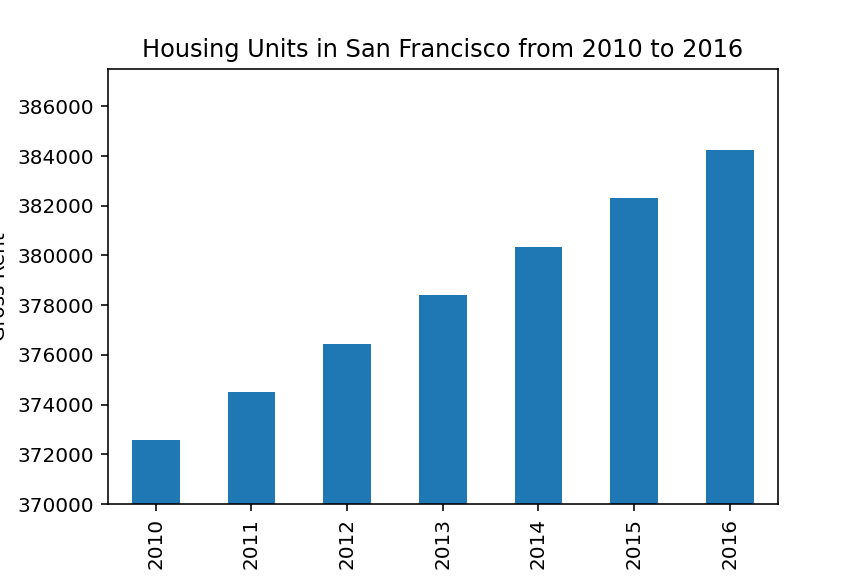
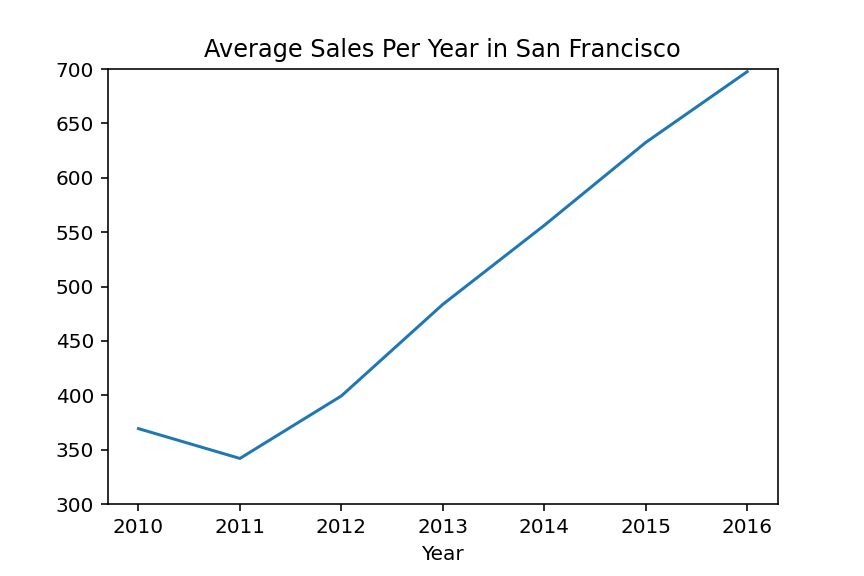
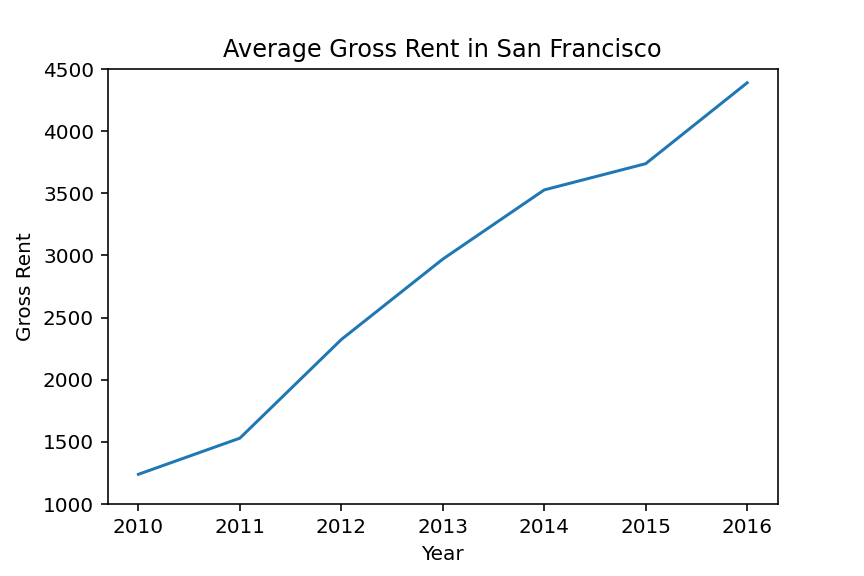

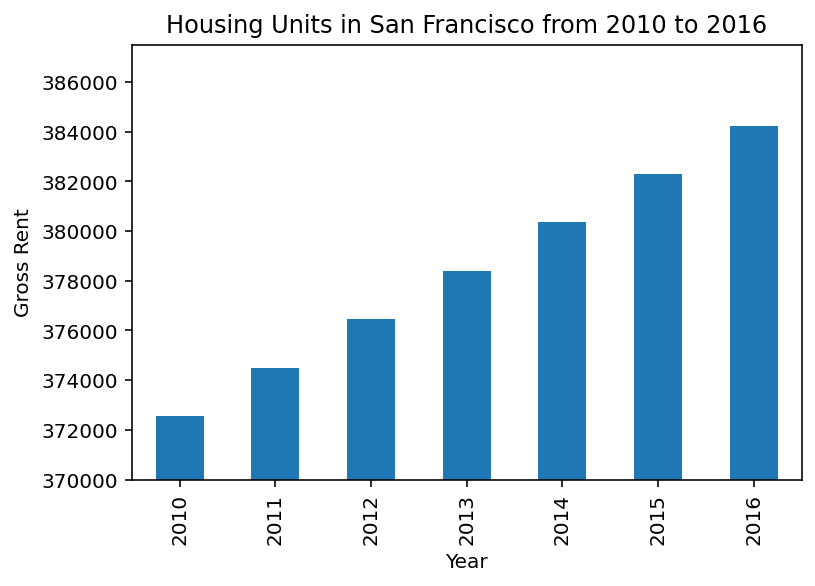

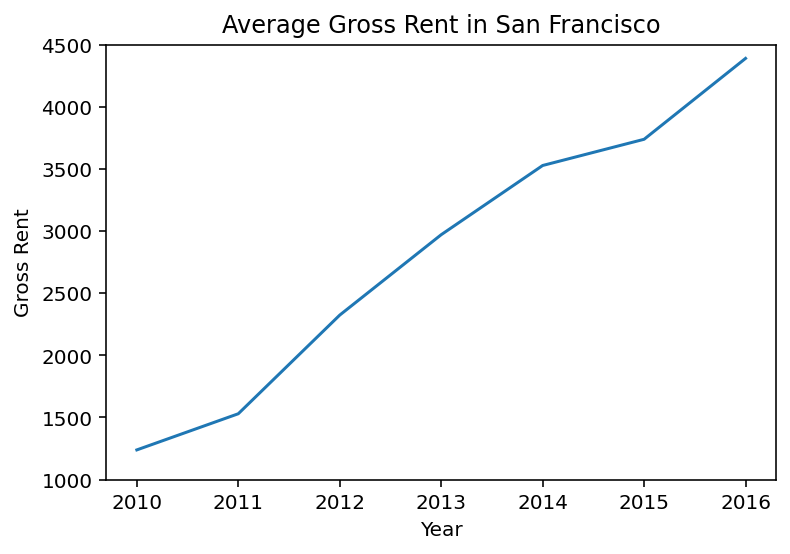

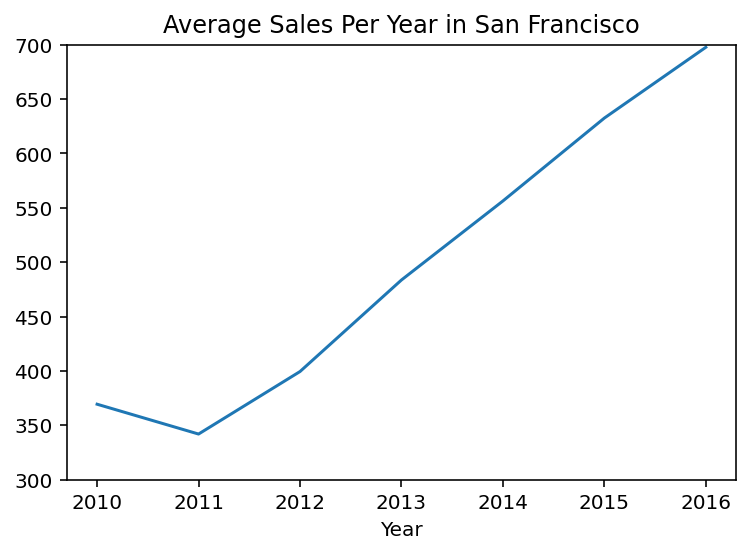

In [28]:
 ##Combine all plots into single dashboard using panel.
    
housing_unit = pn.Column("## SF Housing Unit", housing_units_per_year())
    
    
    
housing_avg = pn.Column(
    "SF Average Value",
    average_gross_rent(),
    average_sales_price(),
    average_price_by_neighborhood())

expensive_neighborhood = pn.Column(
    "Top 10 Most Expensive Neighborhoods",
    top_most_expensive_neighborhoods()
)
parallel_plot = pn.Column(
    "Parallel plot", 
    parallel_coordinates(),
  
#parallel_categories()
)

map_plot = pn.Column(
    "San Fran Map",
    neighborhood_map()
)
panel = pn.Tabs(("Housing Units", housing_unit),
               ("Housing Average", housing_avg),
               ("Parallel Plot", parallel_plot),
               ("SF Map", map_plot))
panel



## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
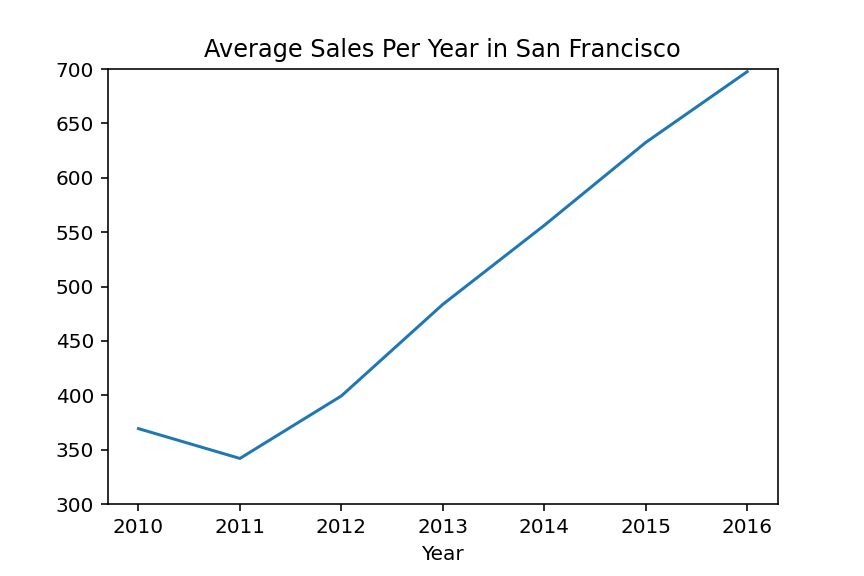
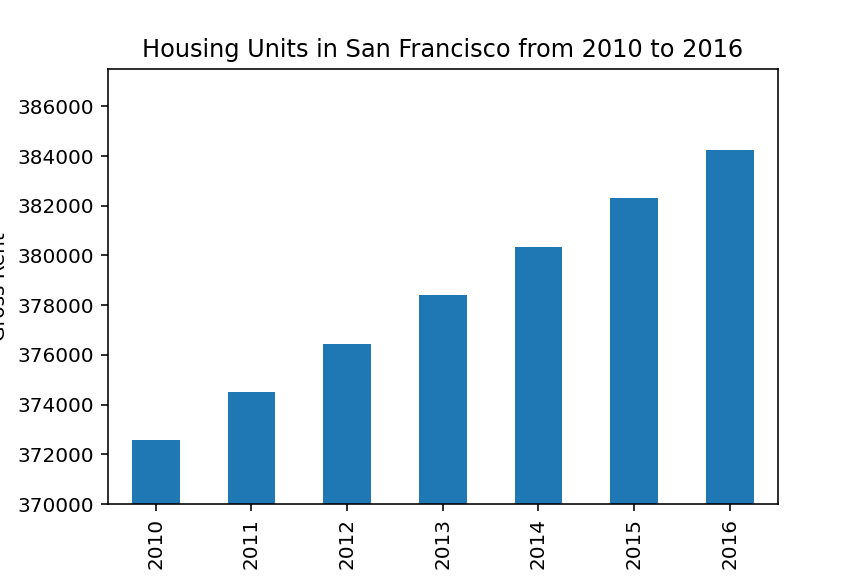
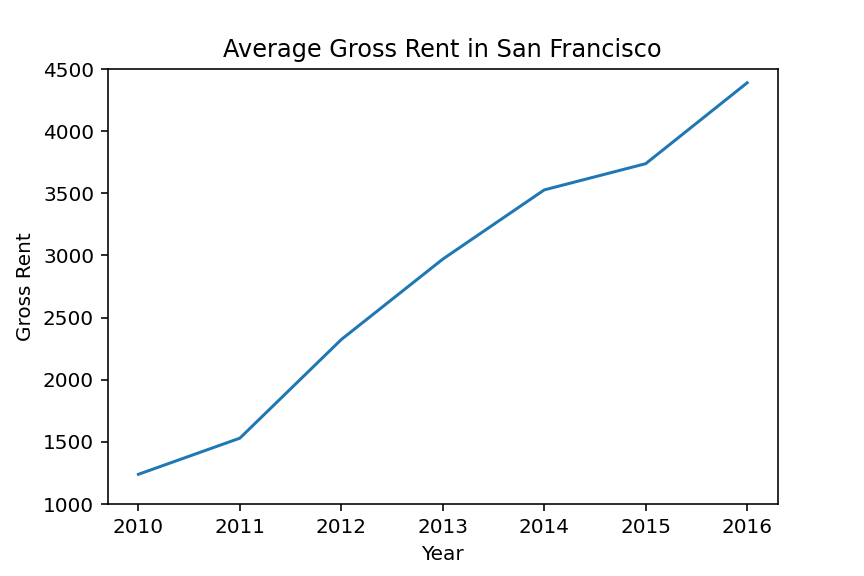

In [26]:
panel.servable()